# **Regresión Lineal**

# **1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc**

In [2]:
##Importamos las librerias correspondientes para obtener un mejor analisis de datos.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Importamos librerias para realizar los reportes
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression

In [3]:
## cargamos el archivo para la lectura de datos
Archivo = pd.read_csv ('C:/Users/ldorado/Downloads/Car_Data.csv')
## Realizamos un analisis exploratorio en la cual mostramos 10 primeras filas que contiene el dataset.
Archivo.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
## identificamos la cantidad de registros que tiene el archivo (filas y columnas)
Archivo.shape

(301, 9)

In [16]:
## Eliminamos las siguientes columnas porque contienen valores categoricos las cual no permite realizar la regresion lineal
Archivo = Archivo.drop(['Car_Name' , 'Year' , 'Kms_Driven' , 'Fuel_Type' , 'Seller_Type' , 'Transmission'], axis=1)

In [17]:
Archivo.head()

,Selling_Price,Present_Price,Owner
0,3.35,5.59,0
1,4.75,9.54,0
2,7.25,9.85,0
3,2.85,4.15,0
4,4.60,6.87,0


In [19]:
Archivo.describe()

,Selling_Price,Present_Price,Owner
count,301.000000,301.000000,301.000000
mean,4.661296,7.628472,0.043189
std,5.082812,8.644115,0.247915
min,0.100000,0.320000,0.000000
25%,0.900000,1.200000,0.000000
50%,3.600000,6.400000,0.000000
75%,6.000000,9.900000,0.000000
max,35.000000,92.600000,3.000000


Text(0.5, 1.0, 'Valores faltantes y Atipicos')

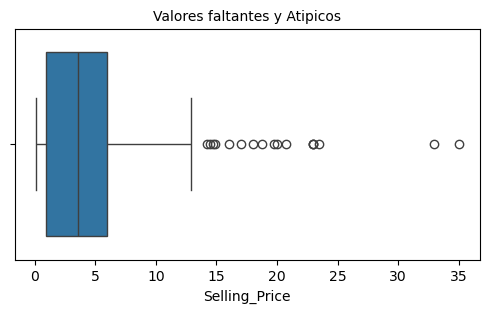

In [20]:
## Datos faltantes y Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Archivo['Selling_Price'])
plt.title( 'Valores faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Valores faltantes y Atipicos')

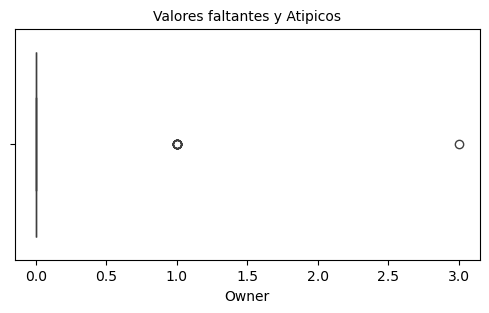

In [21]:
## Datos faltantes y Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Archivo['Owner'])
plt.title( 'Valores faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Valores faltantes y Atipicos')

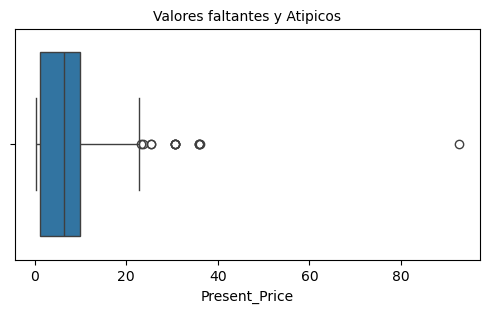

In [22]:
## Datos faltantes y Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Archivo['Present_Price'])
plt.title( 'Valores faltantes y Atipicos', fontsize=10)

# **2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario**

In [23]:
## revision de valores faltantes

print("cantidad de valores con cero en Selling_Price:",Archivo['Selling_Price'].isin([0]).sum())
print("cantidad de valores con cero en Present_Price:",Archivo['Present_Price'].isin([0]).sum())
print("cantidad de valores con cero en Owner:",Archivo['Owner'].isin([0]).sum())

cantidad de valores con cero en Selling_Price: 0
cantidad de valores con cero en Present_Price: 0
cantidad de valores con cero en Owner: 290


Text(0.5, 1.0, 'identificacion de valores Atipicos')

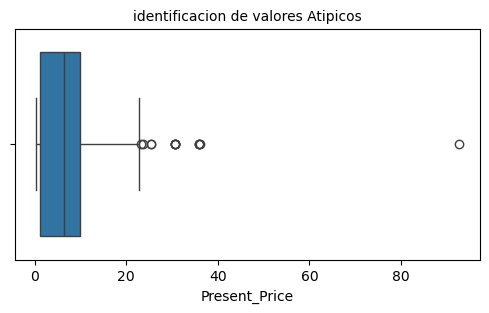

In [24]:
## Datos faltantes y Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Archivo['Present_Price'])
plt.title( 'identificacion de valores Atipicos', fontsize=10)

# **3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.**

In [25]:
## Caracteristicas de interes Present_Price
Archivo ['Present_Price'].value_counts()

Present_Price
9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
18.54     1
7.27      1
15.04     1
10.21     1
12.50     1
Name: count, Length: 147, dtype: int64

# **4. Dividir el dataset en train y test para evaluar correctamente el modelo**

In [26]:
## Creamos las variables
X = Archivo.drop('Present_Price',axis=1)
Y = Archivo['Present_Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state= 0)

In [27]:
print(X_train)

     Selling_Price  Owner
146           0.55      0
260           9.15      0
37            0.35      0
273           2.25      0
164           0.45      0
..             ...    ...
251           5.00      0
192           0.20      1
117           1.10      0
47            1.05      0
172           0.40      0

[225 rows x 2 columns]


In [28]:
print(X_test)

     Selling_Price  Owner
223           8.25      0
150           0.50      0
226           5.25      0
296           9.50      0
52           18.00      0
..             ...    ...
46            2.65      0
158           0.48      0
230           6.15      0
179           0.31      0
27            6.00      0

[76 rows x 2 columns]


# **5. Entrenar el modelo configurando los diferentes hiperparametros**

In [32]:
Regresion_lineal=LinearRegression()
Regresion_lineal.fit (X_train , Y_train)

prediccion = Regresion_lineal.predict(X_test)      

In [33]:
X_test.head(10)

,Selling_Price,Owner
223,8.25,0
150,0.50,0
226,5.25,0
296,9.50,0
52,18.00,0
261,5.50,0
246,3.75,0
166,0.45,0
221,4.50,0
215,4.50,0


In [38]:
print(prediccion)

[13.65842171  0.88961005  8.71565591 15.71790746 29.72241058  9.12755306
  6.244273    0.80723062  7.47996446  7.47996446  4.51430497  1.25207954
  8.71565591 12.42273026 12.83462741 32.60569063 12.2579714   7.89186161
  0.64247176  2.86671637  7.31520559 12.97678125  8.4849935  18.60118752
  0.39533347  1.35093486  0.69189942  1.13674834  0.88961005  5.99713471
  9.68160404 11.92845368  1.05436891 14.48221601  5.00858155  1.96054264
 10.93990052  7.89186161  4.73883824 13.65842171 15.30601031 33.00111189
  9.12755306 12.15298695  9.12755306 21.31970871  0.56009233  1.79578378
  8.71565591 10.77514166 12.42273026  4.84382269  7.97424104 38.78414788
  2.04292207  1.87816321  1.13674834  4.26716668  6.90330844  6.5511857
  5.84885174  8.1389999   3.36099295 54.4362396   6.244273    9.37469135
 14.15269829  6.32665243  0.72485119  4.43192554  4.76144326  4.43192554
  0.85665828 10.19848565  0.57656821  9.95134736]


# **6. Evaluar el desempeño del modelo en el conjunto de Test con metricas como precision,recall,f1-scorw,etc**

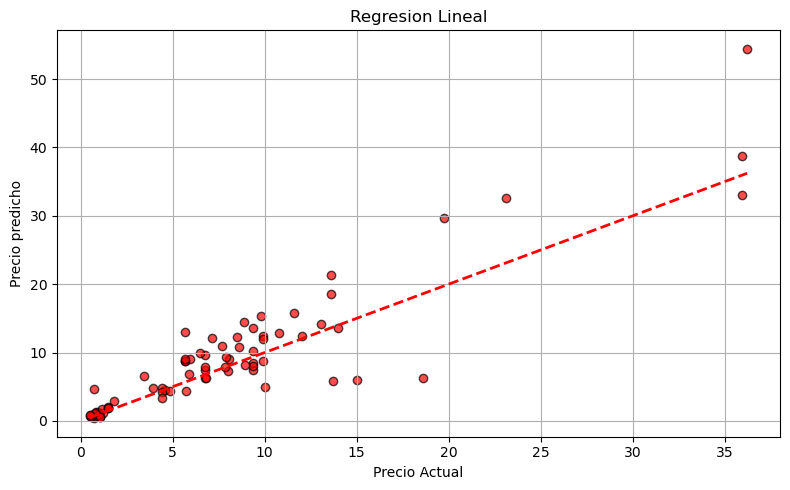

In [46]:
## Evaluamos el modelo

plt.figure(figsize=(8,5))
plt.scatter(Y_test,prediccion,color='red',edgecolors='k', alpha=0.7)
plt.plot([Y_test.min(),Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Actual')
plt.ylabel('Precio predicho')         
plt.title('Regresion Lineal')        
plt.grid(True)
plt.tight_layout() 
plt.show()
         

Interpretar, analizar y documentar los resultados obtenidos.

De acuerdo con el dataset Vehicle se importo las Librerias correspondientes y se identifico con la siguiente línea de código Archivo.shape la cantidad de columnas y filas (301,9).

- Se elimino algunas columnas con el siguiente codigo (Archivo = Archivo.drop) ya que tenía registros categóricos y en regresión lineal no se podía utilizar estos valores para e analisis de datos.

- Se valido los datos faltantes y atípicos  de cada variable 

- al final se realizo un modelo de regresión lineal del precio predicho y precio actual de la variable objetiva "Selling_Price"  
